In [25]:
import pandas as pd
from datetime import datetime
from matplotlib import pyplot as plt
import numpy as np
# Select plot style
plt.style.use("fivethirtyeight")
# Professional colours
# axes.color_cycle    : 332288, 88CCEE, 44AA99, 117733, 999933, DDCC77, CC6677, 882255, AA4499
# Source: https://stats.stackexchange.com/questions/118033/best-series-of-colors-to-use-for-differentiating-series-in-publication-quality
#print(plt.style.available)

In [32]:
def processData(data):
    
    data = data.copy()
    # Convert to datetime type
    data["date"] = data["month"].apply(lambda x: x + "-01")
    data["date"] = data["date"].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
    # Get date components
    data["year"] = data.date.apply(lambda x: x.year)
    data["month"] = data.date.apply(lambda x: x.month)
    data["month_name"] = data.date.apply(lambda x: x.strftime("%b"))
    sortOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    data["month_name"] = data["month_name"].astype("category")
    data["month_name"] = pd.Categorical(data["month_name"], categories = sortOrder, ordered = True)
    data.index = data["date"]
    # Ensure no duplicate days
    if data.index.is_unique:
        print("Unique daily records")
    else:
        print("Duplicate dates exist!")
    # Prepare 12-month moving average model
    data["total_rainfall_12ma"] = data["total_rainfall"].rolling(12).mean()
    data["total_rainfall_previous_month"] = data["total_rainfall"].shift(1)
    data["total_rainfall_previous_12months"] = data["total_rainfall"].shift(12)
    
    return data

In [33]:
def correlationLags(data):
    
    # Determine correlation to lags from 1 month back to 24 months back
    correlations = []
    
    for i in range(1, 25):
        correlationValue = data.total_rainfall.corr(data.total_rainfall.shift(i))
        print(f"Correlation at lag {i}: {correlationValue}")
        correlations.append(correlationValue)
        
    # Retrieve lag with strongest and weakest correlation with current time t
    minCorrelationIndex = np.argmin(np.abs(correlations))
    maxCorrelationIndex = np.argmax(np.abs(correlations))
    
    print(f"Strongest correlation at lag {maxCorrelationIndex+1}")
    print(f"Weakest correlation at lag {minCorrelationIndex+1}")
        
    return correlations

In [34]:
def plotMA(data):
    
    # Show original and moving average rainfall
    data["total_rainfall"].plot(color = "#88CCEE", linestyle = "solid", linewidth = 1, figsize = (15, 7), label = "Original")
    data["total_rainfall_12ma"].plot(color = "#44AA99", linestyle = "solid", linewidth = 3, label = "12-month Moving Average")
    plt.legend(loc = "best")
    plt.title("Rainfall monthly in Singapore")
    plt.show()

In [38]:
def groupPlot(data):
    
    # Determine if seasonality exists yearly or monthly on average
    yearGroup = data.groupby("year").total_rainfall.mean()
    yearGroupDf = pd.DataFrame(yearGroup)
    monthGroup = data.groupby("month_name").total_rainfall.mean()
    monthGroupDf = pd.DataFrame(monthGroup)
    monthGroupDf["month_name"] = monthGroupDf.index
    monthGroupDf["month_name"] = monthGroupDf["month_name"].astype('category') 
    sortOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    monthGroupDf.index = pd.CategoricalIndex(monthGroupDf.month_name, categories = sortOrder, ordered = True)
    monthGroupDf = monthGroupDf.sort_index().reset_index(drop = True)
    monthGroupDf["scaled"] = (monthGroupDf["total_rainfall"] - monthGroupDf["total_rainfall"].mean())/\
    monthGroupDf["total_rainfall"].mean()
    
    # Create seasonality plots
    fig = plt.figure(figsize = (15, 12))
    ax1 = fig.add_subplot(3, 1, 1)
    ax2 = fig.add_subplot(3, 1, 2)
    ax3 = fig.add_subplot(3, 1, 3)
    
    ax1.plot(yearGroupDf.index, yearGroupDf.total_rainfall, linestyle = '-', color = '#332288')
    ax2.bar(monthGroupDf["month_name"], monthGroupDf.total_rainfall, color = '#117733')
    ax3.bar(monthGroupDf["month_name"], monthGroupDf.scaled, color = '#DDCC77')
    ax1.title.set_text('Yearly average rainfall')
    ax2.title.set_text('Monthly average rainfall')
    ax3.title.set_text('Monthly average rainfall scaled')
    plt.show()

In [39]:
def main():
    # Run entire pipeline
    data = pd.read_csv("rainfall_monthly_total_singapore_20220425.csv")
    data = processData(data)
    data = data[data.year < 2022]
    correlations = correlationLags(data)
    plotMA(data)
    groupPlot(data)

Unique daily records
Correlation at lag 1: 0.17723471605982383
Correlation at lag 2: 0.04575601692678639
Correlation at lag 3: -0.06309408002897107
Correlation at lag 4: 0.021775142556025105
Correlation at lag 5: -0.08679252389436215
Correlation at lag 6: -0.03457348099908631
Correlation at lag 7: -0.014556151709412019
Correlation at lag 8: 0.051544939967774595
Correlation at lag 9: -0.07520342392208
Correlation at lag 10: -0.02870745902219973
Correlation at lag 11: 0.09013408732364477
Correlation at lag 12: 0.24828950201581923
Correlation at lag 13: 0.0629474580404434
Correlation at lag 14: 0.010308005287181787
Correlation at lag 15: -0.12580007173168015
Correlation at lag 16: -0.06135549102472368
Correlation at lag 17: -0.13954668179132318
Correlation at lag 18: -0.07468999274008686
Correlation at lag 19: -0.08505526072596525
Correlation at lag 20: 0.021042926841787424
Correlation at lag 21: -0.11987537379085267
Correlation at lag 22: 0.007275479874264713
Correlation at lag 23: 0.052

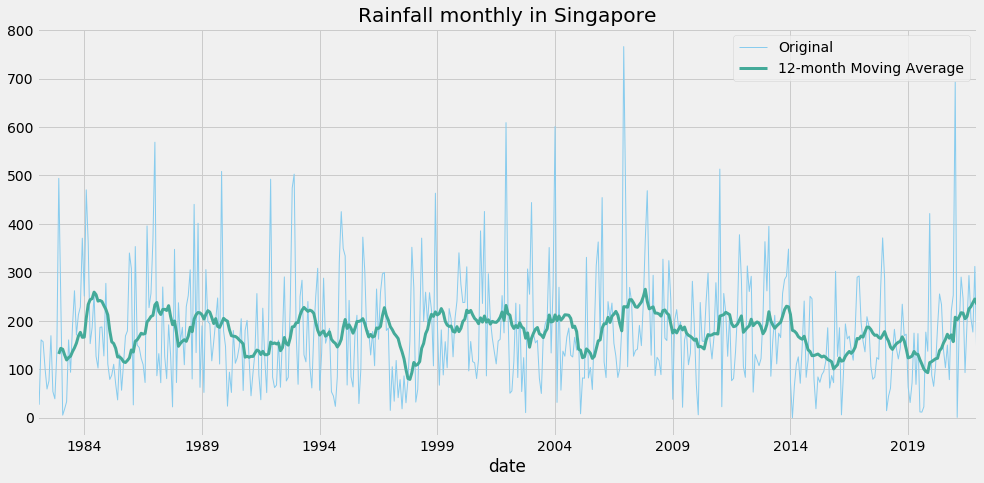

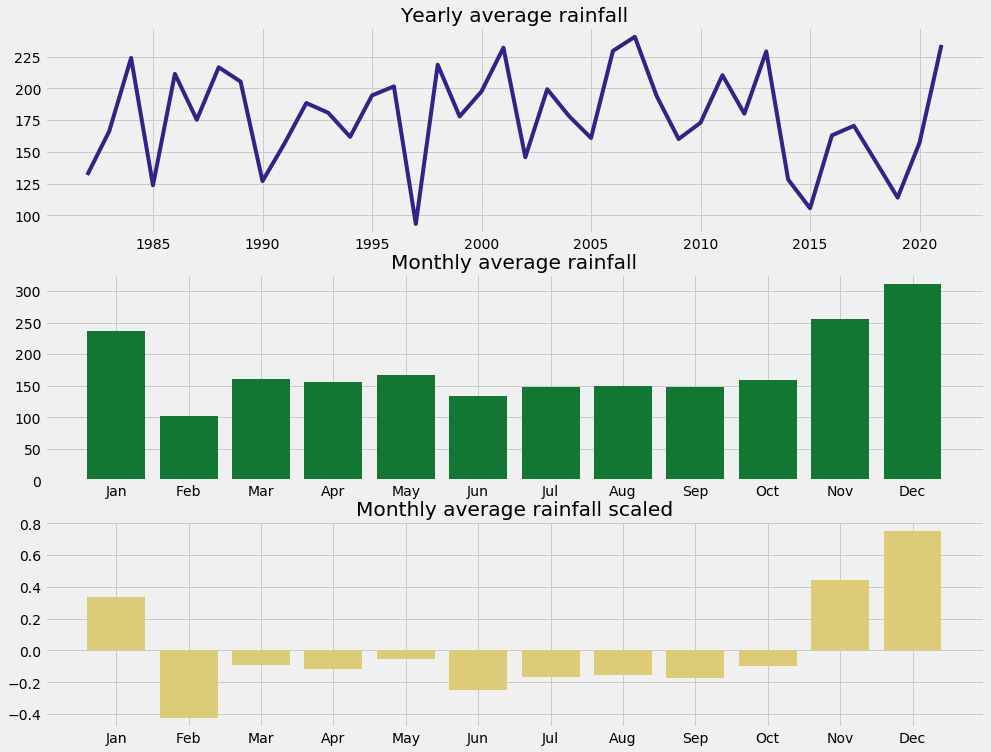

In [40]:
if __name__ == '__main__':
    main()